# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 
#### Originally by Dr. Ryan Ahmed 
https://www.udemy.com/python-3-beginner-to-pro/ 





# STEP #0: PROBLEM STATEMENT

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

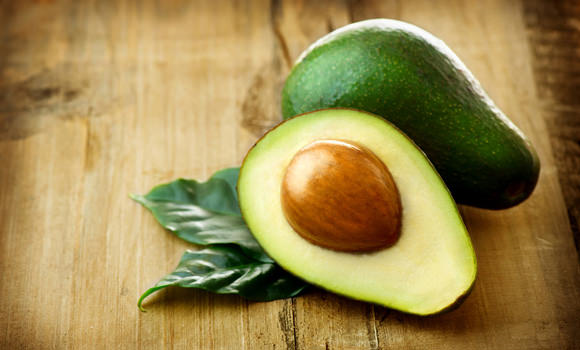

# STEP #1: IMPORTING DATA

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


## Import Libraries

In [2]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


## Create Dataframes

In [3]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


# STEP #2: EXPLORING THE DATASET  

In [6]:
# Let's view the head of the training dataset
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [7]:
# Let's view the last elements in the training dataset
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


## Visualizing the price developement by date

In [11]:
avocado_df = avocado_df.sort_values("Date")

In [12]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


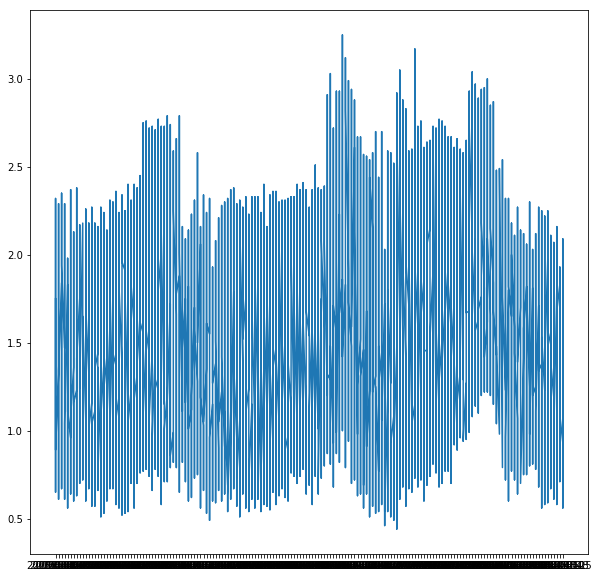

In [13]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df["Date"], avocado_df["AveragePrice"])

## How is the data distributed between the regions?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

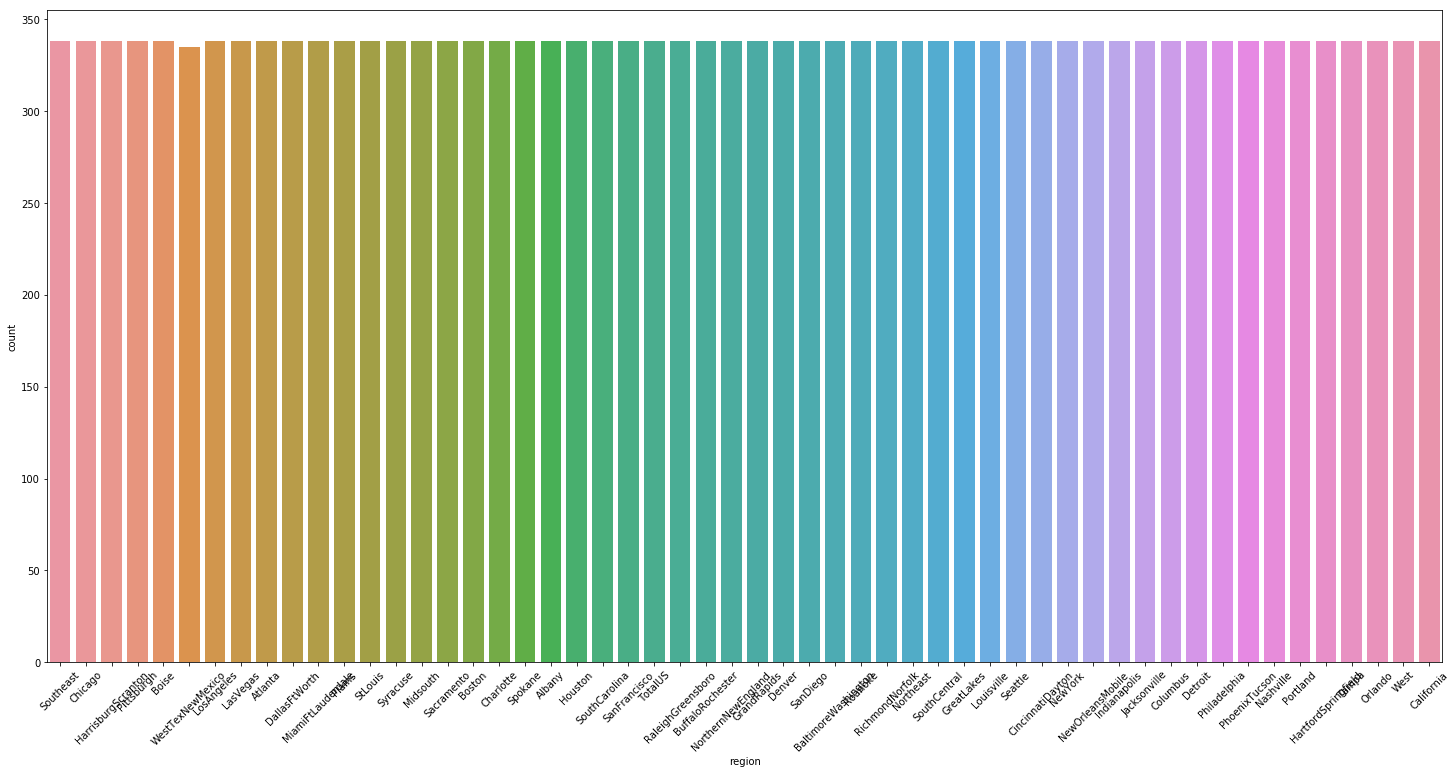

In [24]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


# How is the data distributed between the years?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

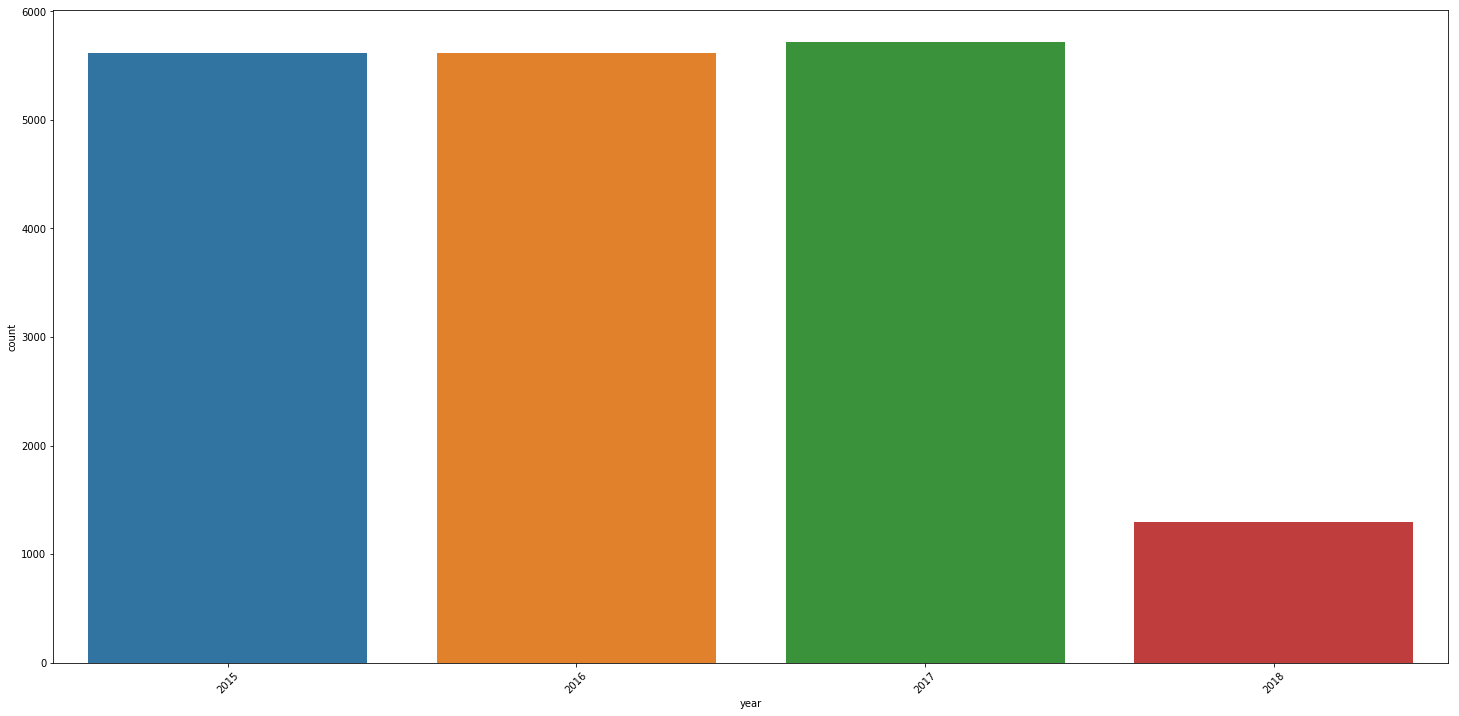

In [27]:
plt.figure(figsize=[25,12])
sns.countplot(x = "year", data= avocado_df)
plt.xticks(rotation = 45)

## Create a new dataframe for the facebook prophet

In [38]:
avocado_prophet_df = avocado_df[["Date","AveragePrice"]]

In [39]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


## Rename the columns for fb prophet

In [42]:
avocado_prophet_df = avocado_prophet_df.rename(columns={"Date":"ds", "AveragePrice":"y"})

In [43]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# STEP 3: MAKE PREDICTIONS

## Load the data into the model 

In [48]:
m = Prophet() # from fbprophet import Prophet

In [49]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecasting

In [52]:
future = m.make_future_dataframe(periods=365)

In [53]:
forecast = m.predict(future)

In [56]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498874,0.913628,1.859638,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
1,2015-01-04,1.498874,0.898787,1.894922,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
2,2015-01-04,1.498874,0.865531,1.844906,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
3,2015-01-04,1.498874,0.876853,1.855145,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
4,2015-01-04,1.498874,0.916598,1.893708,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105


## Visualizing the forecast

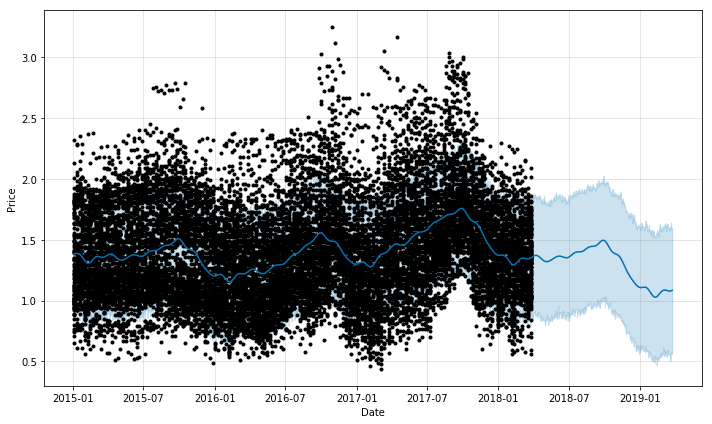

In [58]:
figure = m.plot(forecast, xlabel="Date", ylabel="Price")

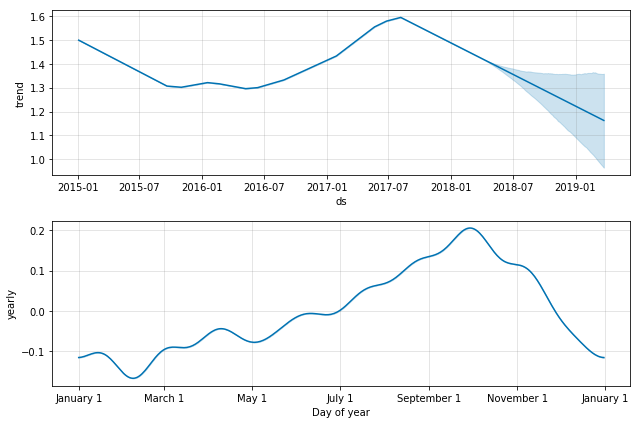

In [59]:
figure2 = m.plot_components(forecast)

# Focus on specific region for the forecast

In [61]:
avocado_df = pd.read_csv("avocado.csv")

In [62]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Prepare the sample

In [64]:
avocado_df_sample = avocado_df[avocado_df["region"]=="West"]

In [65]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [67]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

In [68]:
avocado_df_sample.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West
18225,0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West


## Show the progression of the price for region West

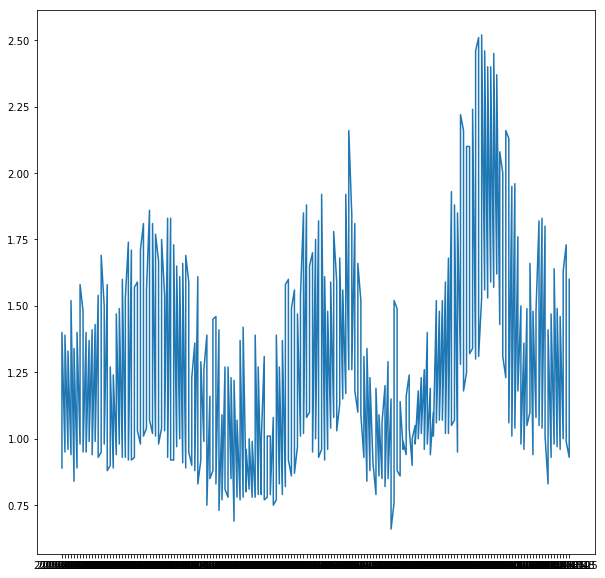

In [70]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample["Date"], avocado_df_sample["AveragePrice"])

## Prepare the sample for FB prophet

In [74]:
avocado_df_sample = avocado_df_sample.rename(columns={"Date":"ds", "AveragePrice":"y"})

In [75]:
avocado_df_sample.head()

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


normally we would need to get rid of the other columns

In [77]:
m = Prophet()

In [78]:
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
future = m.make_future_dataframe(periods=365)

In [82]:
future.tail()

,ds
698,2019-03-21
699,2019-03-22
700,2019-03-23
701,2019-03-24
702,2019-03-25


In [83]:
forecast = m.predict(future)

In [84]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
698,2019-03-21,1.727219,1.095405,1.937962,1.699198,1.753818,-0.204562,-0.204562,-0.204562,-0.204562,-0.204562,-0.204562,0.0,0.0,0.0,1.522657
699,2019-03-22,1.727781,1.121999,1.962429,1.699691,1.754480,-0.199465,-0.199465,-0.199465,-0.199465,-0.199465,-0.199465,0.0,0.0,0.0,1.528316
700,2019-03-23,1.728343,1.102297,1.966058,1.700184,1.755101,-0.193802,-0.193802,-0.193802,-0.193802,-0.193802,-0.193802,0.0,0.0,0.0,1.534541
701,2019-03-24,1.728905,1.091638,1.957974,1.700662,1.755818,-0.187678,-0.187678,-0.187678,-0.187678,-0.187678,-0.187678,0.0,0.0,0.0,1.541226
702,2019-03-25,1.729466,1.094782,1.990684,1.701087,1.756517,-0.181211,-0.181211,-0.181211,-0.181211,-0.181211,-0.181211,0.0,0.0,0.0,1.548256


## Visualizing the forecast for the region west

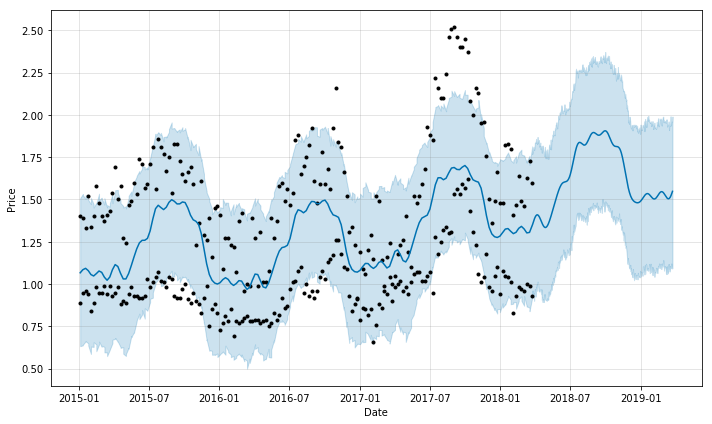

In [85]:
figure = m.plot(forecast, xlabel="Date", ylabel="Price")

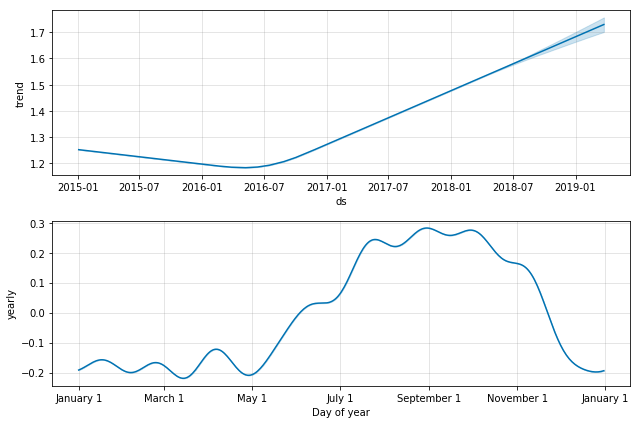

In [86]:
figure2 = m.plot_components(forecast)

# The region shows a complete different trend than the whole market